# Seaborn

_Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics._ [ejemplos](https://seaborn.pydata.org/examples/index.html)



In [1]:
import seaborn as sns
%matplotlib inline

#### Seaborn viene con algunos [datasets](https://github.com/mwaskom/seaborn-data)


In [2]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


#### displot

distribución de una variable

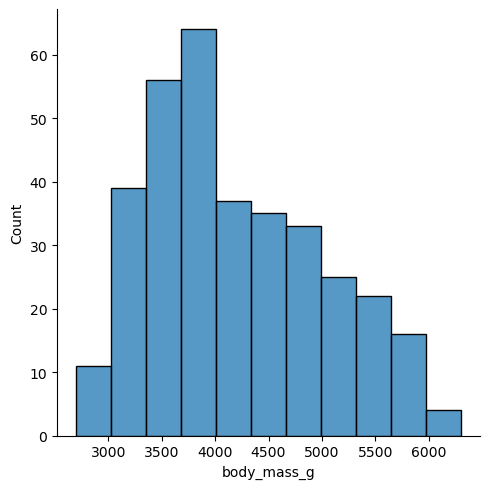

In [3]:
sns.displot(df['body_mass_g'])

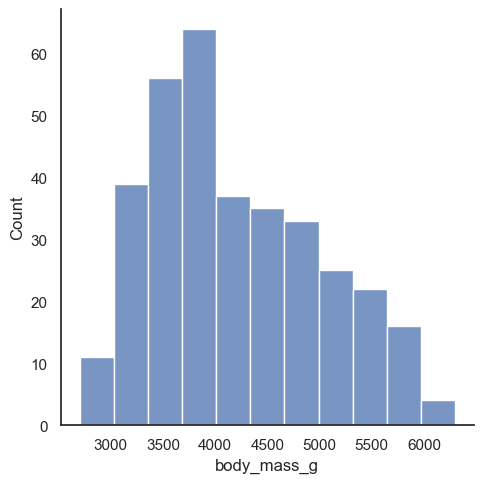

In [4]:
sns.set_theme(style="white")
sns.displot(df['body_mass_g']);

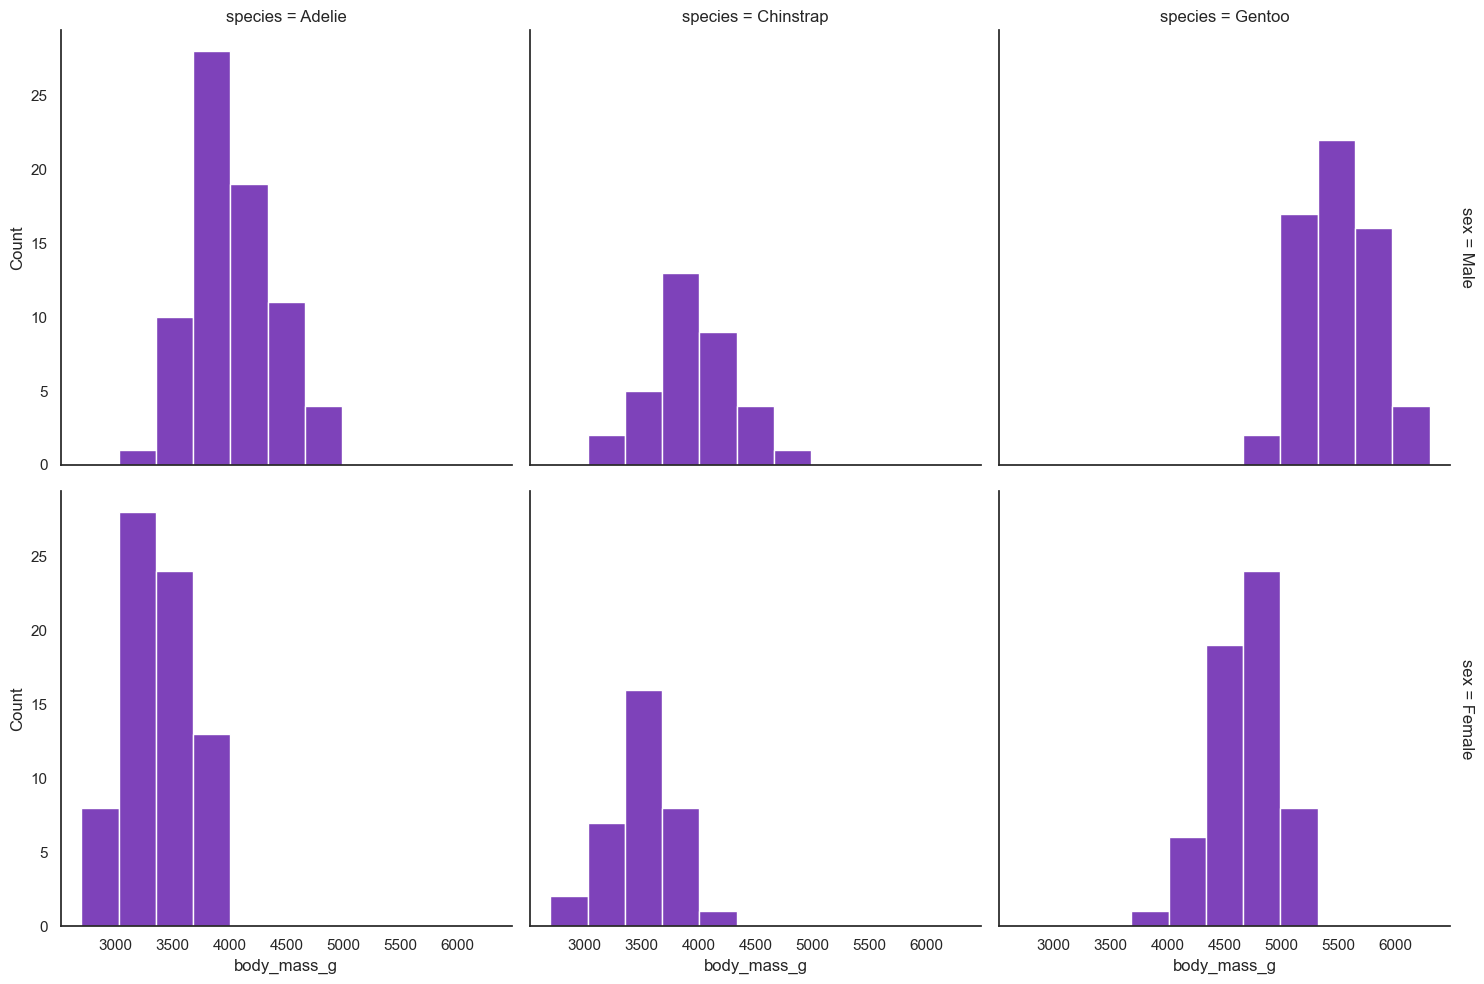

In [5]:
sns.set_theme(style="white", palette="plasma")

sns.displot(df, x="body_mass_g", 
            col="species", 
            row="sex", 
            facet_kws=dict(margin_titles=True));

#### jointplot

distribución de dos variables

kind:
* scatter 
* reg 
* resid 
* kde 
* hex

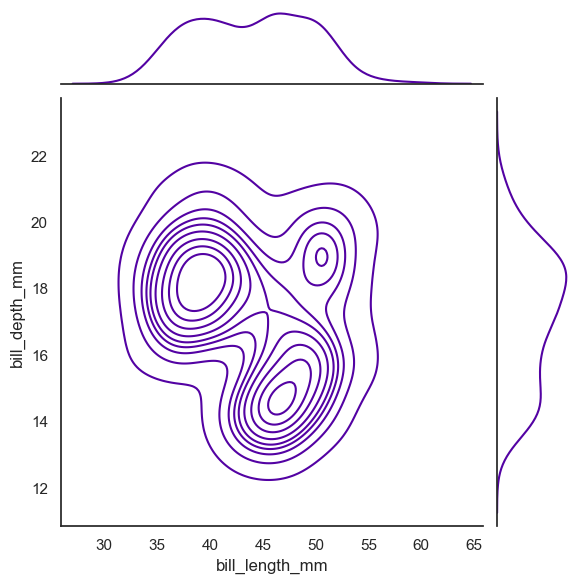

In [6]:
sns.jointplot(data = df, x = "bill_length_mm", y = "bill_depth_mm", kind='kde')

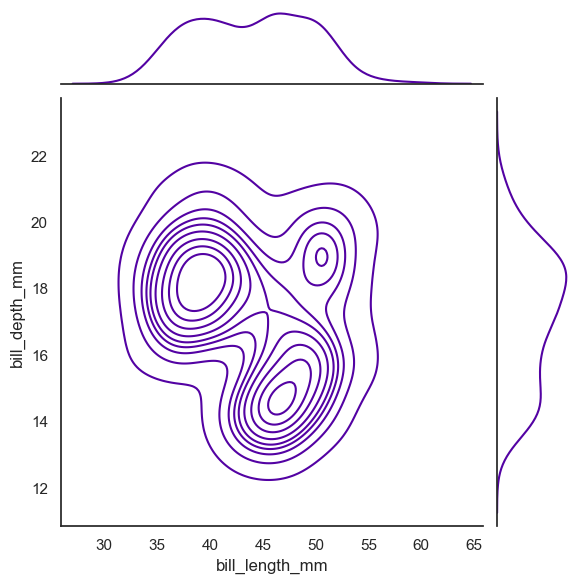

In [7]:
sns.jointplot(data = df, x = "bill_length_mm", y = "bill_depth_mm", kind="kde")

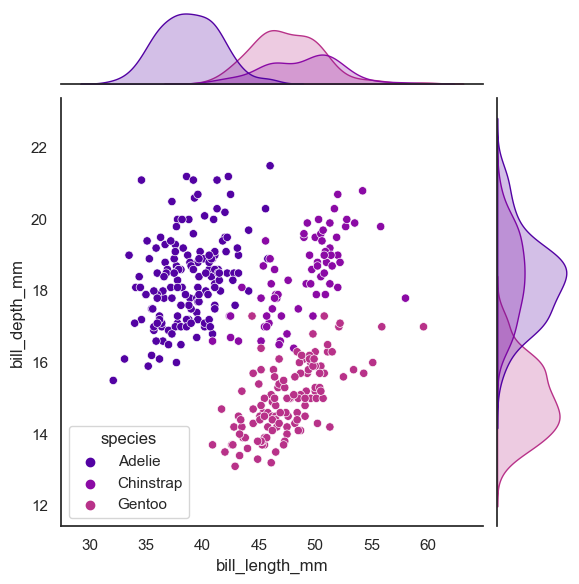

In [8]:
# hue -> hace agrupaciones en la variable indicada (**categorica**)
sns.jointplot(data = df, x = "bill_length_mm", y = "bill_depth_mm", hue="species")

#### pairplot

Grafica joinplots entre todas las variables numéricas. También se puede indicar una variable categorica en _hue_.

kind:
* scatter 
* kde 
* hist
* reg

diag_kind:
* auto
* hist
* kde

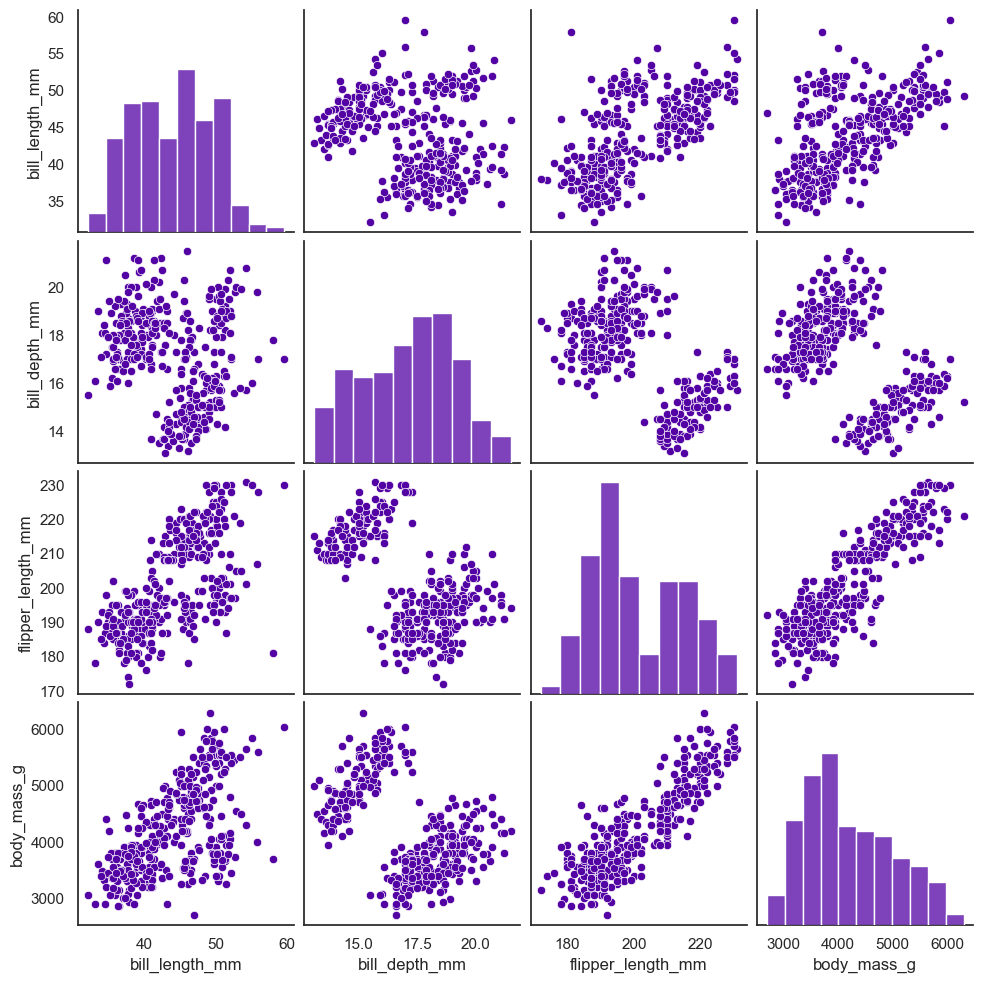

In [9]:
sns.pairplot(df)

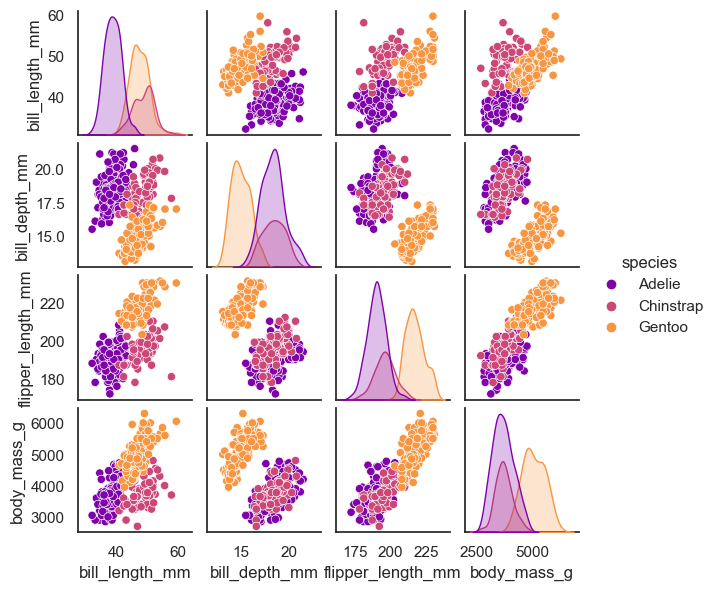

In [10]:
sns.pairplot(df, hue="species", height=1.5, palette='plasma');

## Ejercicio: 

usar otro dataset de los precargados en seaborn y hacer:
* displot
* jointplot
* pairplot

Indicar con diferentes colores grupos de alguna variable categórica. 

#### Boxplots | Violinplots

In [11]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

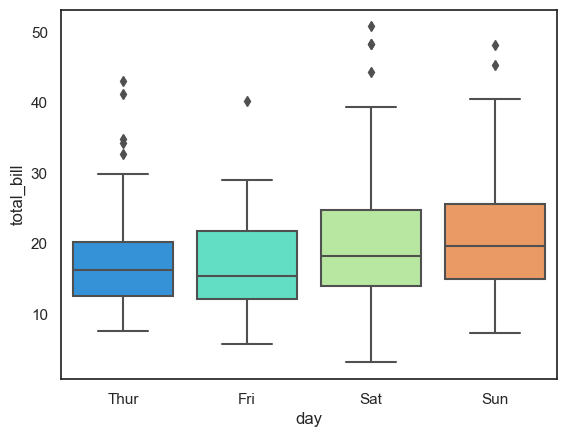

In [12]:
sns.boxplot(data=tips, x="day", y="total_bill", palette='rainbow')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

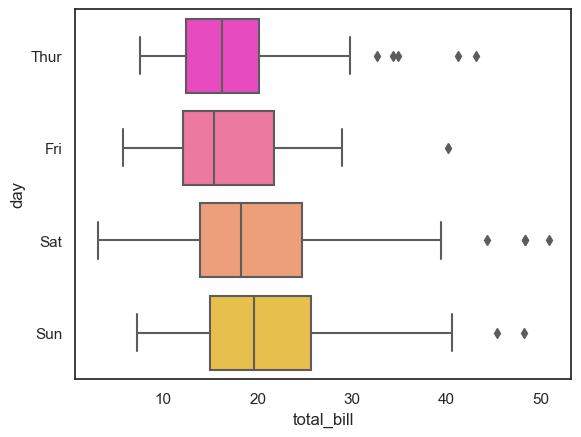

In [13]:
sns.boxplot(data=tips, y="day", x="total_bill", palette='spring', orient='h')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

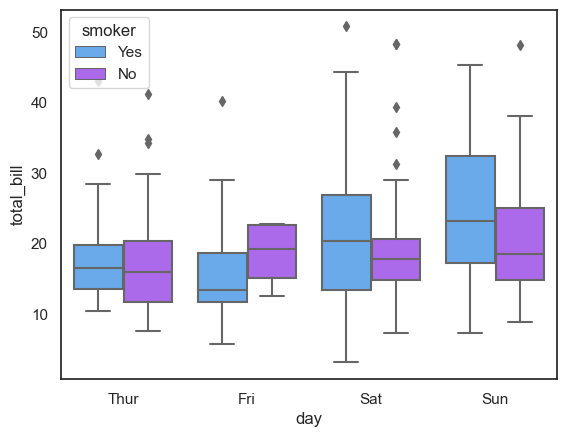

In [14]:
sns.boxplot(x="day", y="total_bill", hue="smoker",data=tips, palette="cool")

<AxesSubplot:xlabel='day', ylabel='total_bill'>

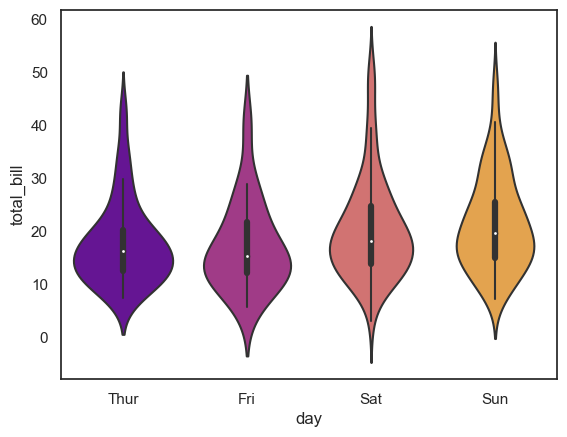

In [15]:
sns.violinplot(data=tips, x="day", y="total_bill", palette='plasma')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

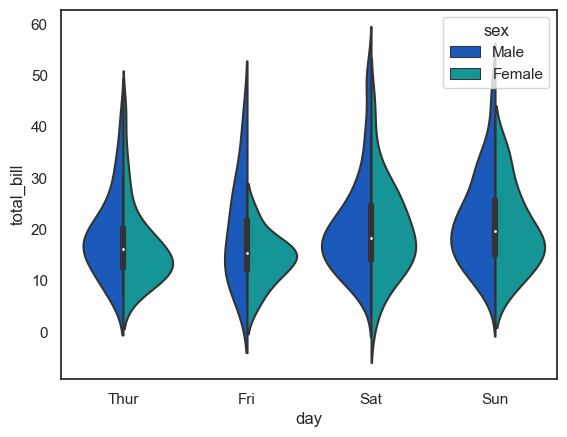

In [16]:
sns.violinplot(data=tips, x="day", y="total_bill", hue='sex', split=True, palette='winter')

<AxesSubplot:xlabel='tip', ylabel='day'>

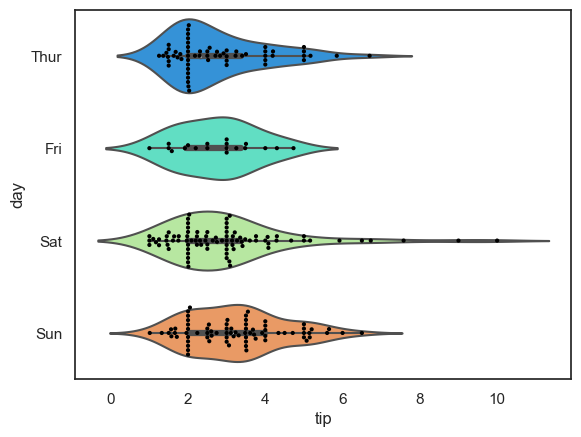

In [17]:
sns.violinplot(data=tips, x="tip", y="day", palette='rainbow')
sns.swarmplot(data=tips, x="tip", y="day", color='black',size=3)

<AxesSubplot:xlabel='tip', ylabel='day'>

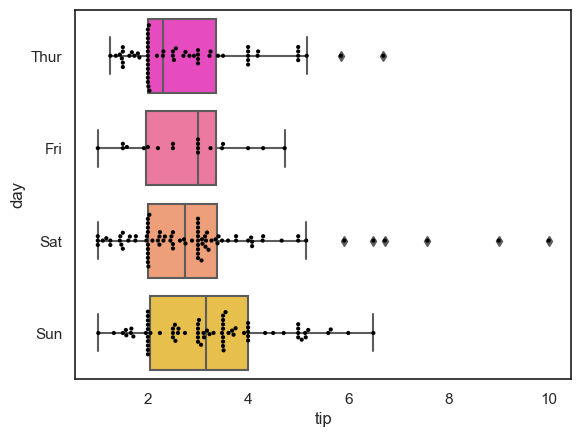

In [18]:
sns.boxplot(data=tips, y="day", x="tip", palette='spring', orient='h')
sns.swarmplot(data=tips, x="tip", y="day", color='black',size=3, orient='h')

#### Heatmaps

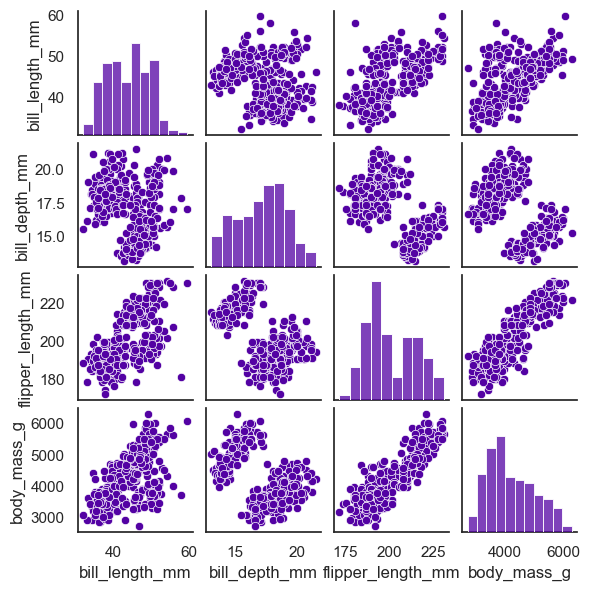

In [19]:
sns.pairplot(df, height=1.5);

In [21]:
#df.corr(numeric_only = True) # coeficiente de correlación de Pearson
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

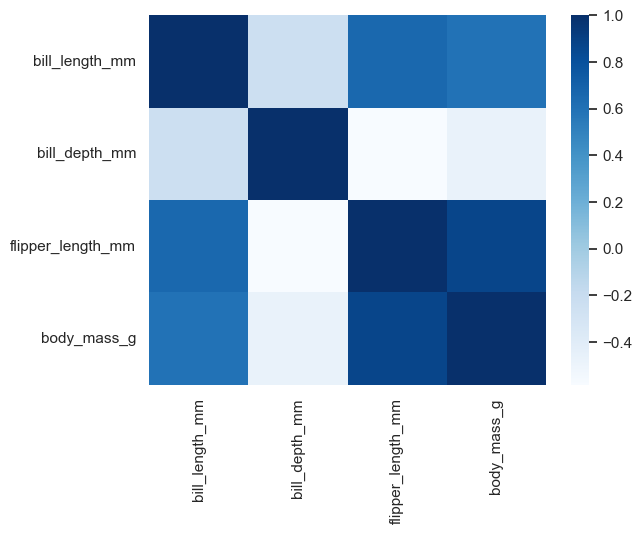

In [24]:
#sns.heatmap(df.corr(numeric_only = True), cmap='Blues')
sns.heatmap(df.corr(), cmap='Blues')

<AxesSubplot:>

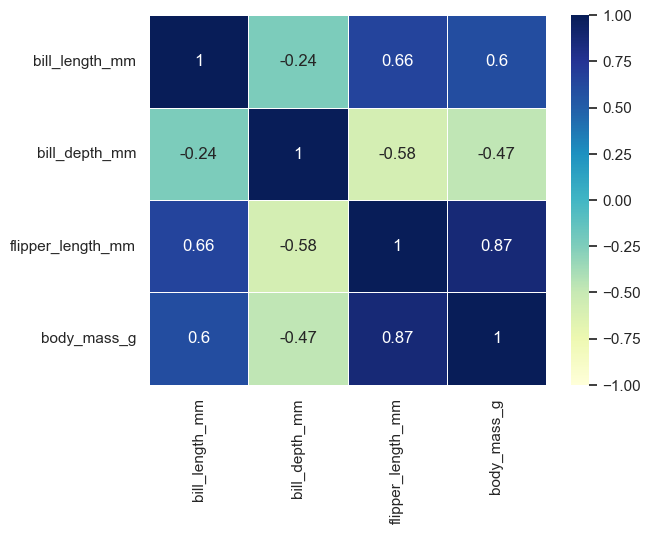

In [26]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=.5)

In [27]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [28]:
flights.pivot(values = "passengers", index= "month", columns = "year")
# aggfunc=np.sum

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


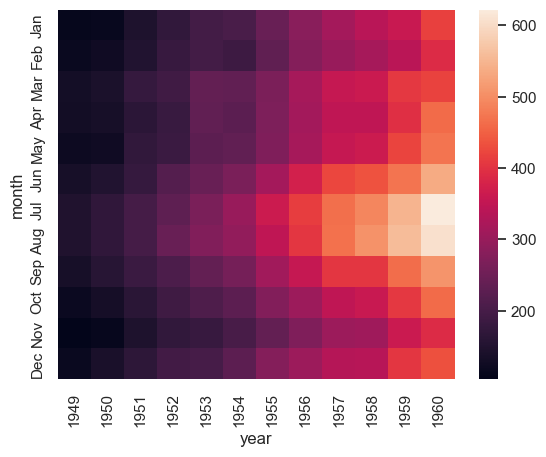

In [29]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights);

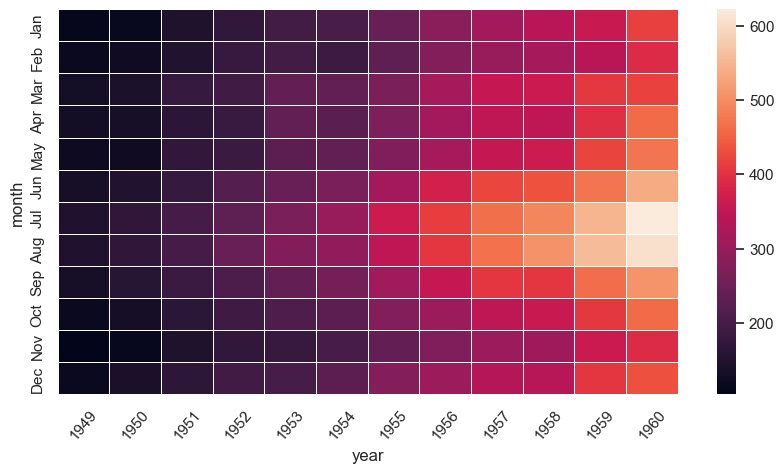

In [30]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(pvflights, linewidths=.5, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);
#ax.set_yticklabels(ax.get_yticklabels(), rotation=0);